# Detect similar images using clustering

This notebooks demonstrates the idea behind the `ImageClusteringSkill` using a small dataset. Basically, the algorithm consists of the following two steps:
1. Extract VGG16 embeddings
2. Cluster embeddings using DBSCAN

In [1]:
import sys
sys.path.append("../")

from sklearn.utils.estimator_checks import check_estimator

import logging 
import matplotlib.pyplot as plt
import ipyplot

from ml.extractors.vgg16_extractor import VGG16Extractor
from ml.models.DBSCAN import DBSCANv2
from ml.similarity.detector import ImageSimilarityDetector
from ml.utils.image import read_images_from_folder

logging.getLogger().setLevel(logging.INFO)

100%|██████████| 30/30 [00:00<00:00, 68.27it/s]



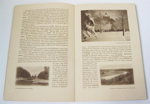
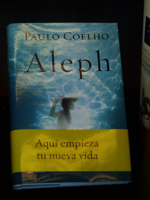
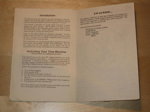
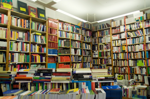
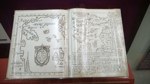
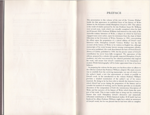
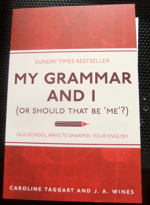
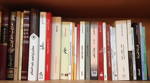
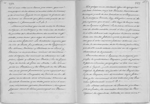
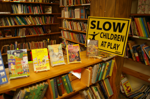


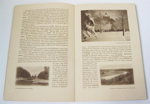
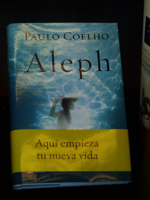
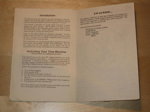
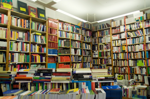
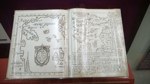
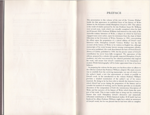
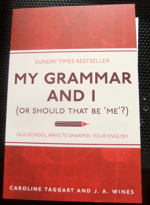
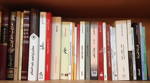
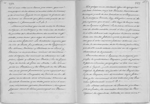
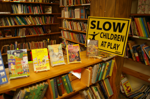

In [2]:
# Download sample dataset and display images
images_train, _ = read_images_from_folder('../data/train')

ipyplot.plot_images(images_train, img_width=150, max_images=10)

In [3]:
# Create VGG16 extractor
extractor = VGG16Extractor(weights="../models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5")

# Create DBSCANv2 instance and verify whether the custom class is correct
model = DBSCANv2(eps=0.64, min_samples=3, metric="cosine")
check_estimator(model)

# Create similarity detector
detector = ImageSimilarityDetector(extractor, model)

# Train detector
labels_train = detector.train(images_train)

INFO:root:Estimated number of clusters: 3
INFO:root:Estimated number of noise points: 4



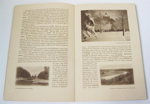
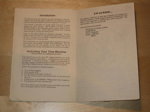
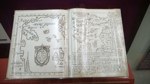
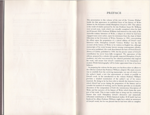
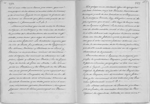
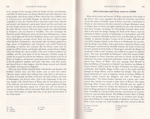
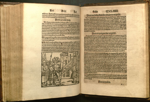
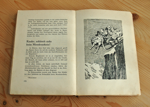
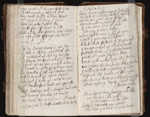
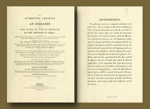


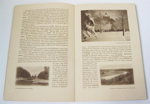
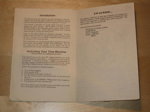
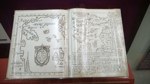
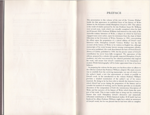
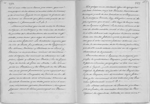
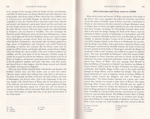
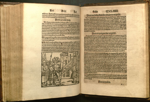
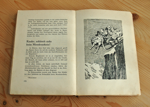
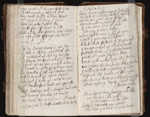
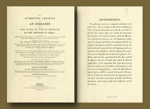

In [5]:
# Display images for cluster #0

cluster_id = 0
clust = images_train[labels_train == cluster_id]
ipyplot.plot_images(clust, img_width=150, max_images=len(clust), labels=labels_train[labels_train == cluster_id])

100%|██████████| 9/9 [00:00<00:00, 77.76it/s]



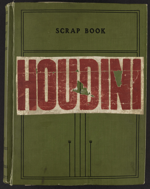
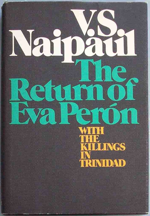
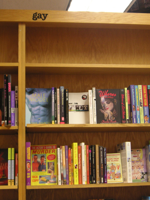
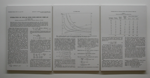
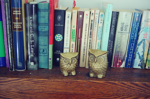
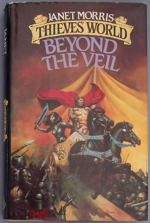
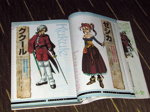
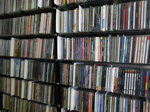
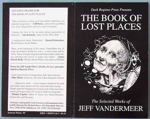


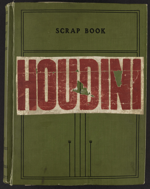
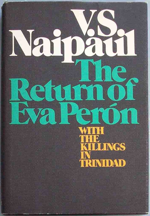
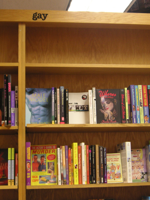
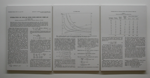
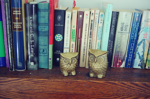
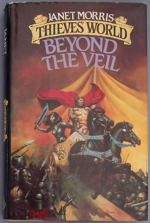
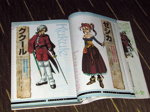
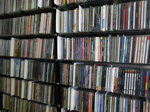
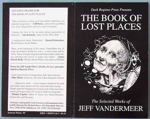

In [10]:
# Download test data 
images_test, _ = read_images_from_folder('../data/test')

# Scoring
labels_test = detector.assign_group(images_test)

ipyplot.plot_images(images_test, img_width=150, max_images=20, labels=labels_test)